In [48]:
import pandas as pd
import seaborn as sns
import tensorflow.compat.v1 as tf
import numpy  as np
import matplotlib.pyplot as plt

tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [65]:
column_names = [
  '사용월',
  '호선명',
  '지하철역',
  '00시-01시 승차인원',
  '00시-01시 하차인원',
  '01시-02시 승차인원',
  '01시-02시 하차인원',
  '02시-03시 승차인원',
  '02시-03시 하차인원',
  '03시-04시 승차인원',
  '03시-04시 하차인원',
  '04시-05시 승차인원',
  '04시-05시 하차인원',
  '05시-06시 승차인원',
  '05시-06시 하차인원',
  '06시-07시 승차인원',
  '06시-07시 하차인원',
  '07시-08시 승차인원',
  '07시-08시 하차인원',
  '08시-09시 승차인원',
  '08시-09시 하차인원',
  '09시-10시 승차인원',
  '09시-10시 하차인원',
  '10시-11시 승차인원',
  '10시-11시 하차인원',
  '11시-12시 승차인원',
  '11시-12시 하차인원',
  '12시-13시 승차인원',
  '12시-13시 하차인원',
  '13시-14시 승차인원',
  '13시-14시 하차인원',
  '14시-15시 승차인원',
  '14시-15시 하차인원',
  '15시-16시 승차인원',
  '15시-16시 하차인원',
  '16시-17시 승차인원',
  '16시-17시 하차인원',
  '17시-18시 승차인원',
  '17시-18시 하차인원',
  '18시-19시 승차인원',
  '18시-19시 하차인원',
  '19시-20시 승차인원',
  '19시-20시 하차인원',
  '20시-21시 승차인원',
  '20시-21시 하차인원',
  '21시-22시 승차인원',
  '21시-22시 하차인원',
  '22시-23시 승차인원',
  '22시-23시 하차인원',
  '23시-24시 승차인원',
  '23시-24시 하차인원',
]
dataset_path = './dataset/subway.csv'

raw_dataset = pd.read_csv(dataset_path, na_values='?', comment='\t', sep=',', skipinitialspace=True, encoding='cp949')

dataset = raw_dataset.copy()
dataset.head()

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202104,1호선,동대문,635,9,12446,1948,8958,7019,14035,...,8304,14,1286,1,2,0,0,0,0,20210503
1,202104,1호선,동묘앞,57,3,2966,885,3409,4736,5917,...,2344,3,1198,0,0,0,0,0,0,20210503
2,202104,1호선,서울역,746,16,9151,6038,11560,33958,36079,...,7638,13,570,0,0,0,0,0,0,20210503
3,202104,1호선,시청,29,0,1711,3796,2774,19145,6323,...,1308,5,86,0,0,0,0,0,0,20210503
4,202104,1호선,신설동,270,10,8305,3003,7977,10434,17091,...,5136,9,294,0,0,0,0,0,0,20210503


In [3]:
dataset.isna().sum()

사용월             0
호선명             0
지하철역            0
04시-05시 승차인원    0
04시-05시 하차인원    0
05시-06시 승차인원    0
05시-06시 하차인원    0
06시-07시 승차인원    0
06시-07시 하차인원    0
07시-08시 승차인원    0
07시-08시 하차인원    0
08시-09시 승차인원    0
08시-09시 하차인원    0
09시-10시 승차인원    0
09시-10시 하차인원    0
10시-11시 승차인원    0
10시-11시 하차인원    0
11시-12시 승차인원    0
11시-12시 하차인원    0
12시-13시 승차인원    0
12시-13시 하차인원    0
13시-14시 승차인원    0
13시-14시 하차인원    0
14시-15시 승차인원    0
14시-15시 하차인원    0
15시-16시 승차인원    0
15시-16시 하차인원    0
16시-17시 승차인원    0
16시-17시 하차인원    0
17시-18시 승차인원    0
17시-18시 하차인원    0
18시-19시 승차인원    0
18시-19시 하차인원    0
19시-20시 승차인원    0
19시-20시 하차인원    0
20시-21시 승차인원    0
20시-21시 하차인원    0
21시-22시 승차인원    0
21시-22시 하차인원    0
22시-23시 승차인원    0
22시-23시 하차인원    0
23시-24시 승차인원    0
23시-24시 하차인원    0
00시-01시 승차인원    0
00시-01시 하차인원    0
01시-02시 승차인원    0
01시-02시 하차인원    0
02시-03시 승차인원    0
02시-03시 하차인원    0
03시-04시 승차인원    0
03시-04시 하차인원    0
작업일자            0
dtype: int64

In [66]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

_stations = list(set(dataset['지하철역'].to_numpy()))

In [72]:
def findByStation(__station):
    if _stations.count(__station) == 0:
        return 0
    
    select_dataset = dataset[dataset['지하철역'] == __station][column_names[3:]].to_numpy()
    new_data = [[], []]
    
    for data in select_dataset:
        ride = []
        quit = []
        for i in range(48):
            if i % 2 == 0:
                quit.append(data[i])
                continue
            ride.append(data[i])
        new_data[0].append(ride)
        new_data[1].append(quit)
    
    return new_data

종로3가


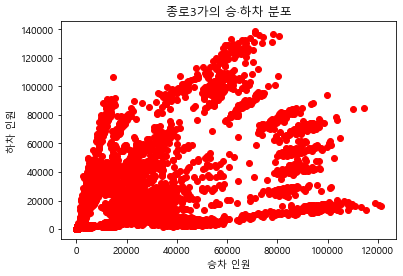

In [159]:
__station = input()
_data = findByStation(__station)

if _data != 0:
    plt.rc('font', family='Malgun Gothic')
    
    plt.title(f'{__station}의 승·하차 분포')

    for i in range(len(_data[0])):
        plt.plot(_data[0][i], _data[1][i], 'ro')
    
    plt.xlabel('승차 인원')
    plt.ylabel('하차 인원')
    plt.show()
else:
    print("해당 역의 데이터를 조회할 수 없습니다.")

In [160]:
__station = input()
_data = findByStation(__station)

x_data = np.ravel(_data[0], order='C')
y_data = np.ravel(_data[1], order='C')

X = tf.placeholder(tf.float32, shape=None)
Y = tf.placeholder(tf.float32, shape=None)

W = tf.Variable(tf.random_uniform([1], -100, 100), 'weight')
b = tf.Variable(tf.random_uniform([1], -100, 100), 'bias')

H = X * W + b

cost = tf.reduce_mean(tf.square(H - Y))

optimizer = tf.train.GradientDescentOptimizer(tf.Variable(0.00000000001))
train = optimizer.minimize(cost)

session = tf.Session()
session.run(tf.global_variables_initializer())

for step in range(100001):
    session.run(train, feed_dict = { X: x_data, Y: y_data })
    if step % 10000 == 0:
        print(step, session.run(cost, feed_dict = { X: x_data, Y: y_data }), session.run(W), session.run(b))

print("예측 30000: ", session.run(H, feed_dict={X: [30000]}))

종로3가
0 348887120000.0 [17.657024] [-86.83148]
10000 666895740.0 [0.7498288] [-86.8317]
20000 666895740.0 [0.7498288] [-86.8317]
30000 666895740.0 [0.7498288] [-86.8317]
40000 666895740.0 [0.7498288] [-86.8317]
50000 666895740.0 [0.7498288] [-86.8317]
60000 666895740.0 [0.7498288] [-86.8317]
70000 666895740.0 [0.7498288] [-86.8317]
80000 666895740.0 [0.7498288] [-86.8317]
90000 666895740.0 [0.7498288] [-86.8317]
100000 666895740.0 [0.7498288] [-86.8317]
예측 30000:  [22408.033]


In [ ]:
print("Hello, World~")

In [78]:
def findComplexityDataByStation(__station):
    select_dataset = dataset[dataset['지하철역'] == __station][column_names[3:]].to_numpy()
    new_data = []
    
    for data in select_dataset:
        for i in range(0, 48, 2):
            ride = data[i]
            quit = data[i + 1]
            new_data.append(ride - quit)
    
    return new_data

종로3가


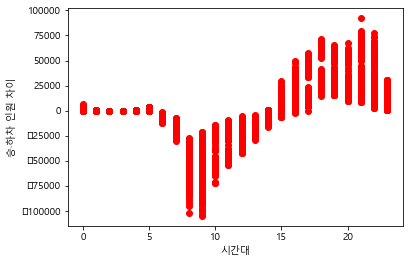

In [139]:
__station = input()
_data = findComplexityDataByStation(__station)

plt.rc('font', family='Malgun Gothic')

for i in range(24, len(_data), 24):    plt.plot(_data[i - 24 : i], 'ro')

plt.xlabel('시간대')
plt.ylabel('승·하차 인원 차이')
plt.show()

In [161]:
__station = input()

y_data = findComplexityDataByStation(__station)
x_data = list(range(24)) * (len(y_data) // 24)

X = tf.placeholder(tf.float32, shape=None)
Y = tf.placeholder(tf.float32, shape=None)

W = tf.Variable(tf.random_uniform([1], -100, 100), 'weight')
b = tf.Variable(tf.random_uniform([1], -100, 100), 'bias')

H = X * W + b

cost = tf.reduce_mean(tf.square(H - Y))

optimizer = tf.train.GradientDescentOptimizer(tf.Variable(0.001))
train = optimizer.minimize(cost)

session = tf.Session()
session.run(tf.global_variables_initializer())

for step in range(100001):
    session.run(train, feed_dict = { X: x_data, Y: y_data })
    if step % 10000 == 0:
        print(step, session.run(cost, feed_dict = { X: x_data, Y: y_data }), session.run(W), session.run(b))

for i in range(25):
    print(f"예측 {i}: ", session.run(H, feed_dict={X: [i]}))

종로3가
0 718848830.0 [167.9552] [-32.381268]
10000 580357500.0 [1836.348] [-21197.41]
20000 580354370.0 [1843.0321] [-21301.975]
30000 580354370.0 [1843.0321] [-21301.975]
40000 580354370.0 [1843.0321] [-21301.975]
50000 580354370.0 [1843.0321] [-21301.975]
60000 580354370.0 [1843.0321] [-21301.975]
70000 580354370.0 [1843.0321] [-21301.975]
80000 580354370.0 [1843.0321] [-21301.975]
90000 580354370.0 [1843.0321] [-21301.975]
100000 580354370.0 [1843.0321] [-21301.975]
예측 0:  [-21301.975]
예측 1:  [-19458.943]
예측 2:  [-17615.91]
예측 3:  [-15772.879]
예측 4:  [-13929.846]
예측 5:  [-12086.814]
예측 6:  [-10243.782]
예측 7:  [-8400.75]
예측 8:  [-6557.718]
예측 9:  [-4714.6855]
예측 10:  [-2871.6543]
예측 11:  [-1028.6211]
예측 12:  [814.41016]
예측 13:  [2657.4434]
예측 14:  [4500.4746]
예측 15:  [6343.508]
예측 16:  [8186.539]
예측 17:  [10029.57]
예측 18:  [11872.604]
예측 19:  [13715.635]
예측 20:  [15558.666]
예측 21:  [17401.701]
예측 22:  [19244.732]
예측 23:  [21087.764]
예측 24:  [22930.795]
